In [9]:
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import text_to_word_sequence

def load_data(percentage_of_sentences=None):
    train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"], batch_size=-1, as_supervised=True)

    train_sentences, y_train = tfds.as_numpy(train_data)
    test_sentences, y_test = tfds.as_numpy(test_data)

    # Take only a given percentage of the entire data
    if percentage_of_sentences is not None:
        assert(percentage_of_sentences> 0 and percentage_of_sentences<=100)

        len_train = int(percentage_of_sentences/100*len(train_sentences))
        train_sentences, y_train = train_sentences[:len_train], y_train[:len_train]

        len_test = int(percentage_of_sentences/100*len(test_sentences))
        test_sentences, y_test = test_sentences[:len_test], y_test[:len_test]

    X_train = [text_to_word_sequence(_.decode("utf-8")) for _ in train_sentences]
    X_test = [text_to_word_sequence(_.decode("utf-8")) for _ in test_sentences]

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = load_data(percentage_of_sentences=10)

In [10]:
print(y_train[0], X_train[0])

print(y_test[10], X_test[10])

0 ['this', 'was', 'an', 'absolutely', 'terrible', 'movie', "don't", 'be', 'lured', 'in', 'by', 'christopher', 'walken', 'or', 'michael', 'ironside', 'both', 'are', 'great', 'actors', 'but', 'this', 'must', 'simply', 'be', 'their', 'worst', 'role', 'in', 'history', 'even', 'their', 'great', 'acting', 'could', 'not', 'redeem', 'this', "movie's", 'ridiculous', 'storyline', 'this', 'movie', 'is', 'an', 'early', 'nineties', 'us', 'propaganda', 'piece', 'the', 'most', 'pathetic', 'scenes', 'were', 'those', 'when', 'the', 'columbian', 'rebels', 'were', 'making', 'their', 'cases', 'for', 'revolutions', 'maria', 'conchita', 'alonso', 'appeared', 'phony', 'and', 'her', 'pseudo', 'love', 'affair', 'with', 'walken', 'was', 'nothing', 'but', 'a', 'pathetic', 'emotional', 'plug', 'in', 'a', 'movie', 'that', 'was', 'devoid', 'of', 'any', 'real', 'meaning', 'i', 'am', 'disappointed', 'that', 'there', 'are', 'movies', 'like', 'this', 'ruining', "actor's", 'like', 'christopher', "walken's", 'good', 'nam

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()

tokenizer.fit_on_texts(X_train)

X_train_token = tokenizer.texts_to_sequences(X_train)
X_test_token = tokenizer.texts_to_sequences(X_test)

In [12]:
sentence_number = 100

input_raw = X_train[sentence_number]
input_token = X_train_token[sentence_number]

for i in range(40):
    print(f'Word : {input_raw[i]} -> Token {input_token[i]}')

Word : i -> Token 9
Word : enjoyed -> Token 579
Word : this -> Token 11
Word : movie -> Token 18
Word : and -> Token 3
Word : after -> Token 104
Word : watching -> Token 155
Word : it -> Token 10
Word : it -> Token 10
Word : made -> Token 90
Word : me -> Token 65
Word : wonder -> Token 574
Word : just -> Token 40
Word : how -> Token 84
Word : many -> Token 107
Word : 'caitlin -> Token 17238
Word : rose's' -> Token 17239
Word : exist -> Token 1632
Word : in -> Token 8
Word : the -> Token 1
Word : world -> Token 189
Word : how -> Token 84
Word : many -> Token 107
Word : other -> Token 82
Word : girls -> Token 526
Word : have -> Token 25
Word : been -> Token 76
Word : subjected -> Token 5574
Word : to -> Token 5
Word : this -> Token 11
Word : sort -> Token 406
Word : of -> Token 4
Word : sexual -> Token 991
Word : abuse -> Token 2393
Word : and -> Token 3
Word : torment -> Token 8200
Word : by -> Token 31
Word : classmates -> Token 7069
Word : and -> Token 3
Word : have -> Token 25


In [13]:
vocab_size = len(tokenizer.word_index)

print(f'There are {vocab_size} different words in the train set')

There are 30419 different words in the train set


In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train_pad = pad_sequences(X_train_token, dtype='float32', padding='post')
X_test_pad = pad_sequences(X_test_token, dtype='float32', padding='post')

In [15]:
from tensorflow.keras import Sequential, Input, layers

embedding_dimension = 50

model = Sequential()

model.add(Input(shape=X_train_pad.shape[1:]))

model.add(layers.Embedding(input_dim=vocab_size + 1, output_dim=embedding_dimension, mask_zero=True))
model.add(layers.LSTM(20))
model.add(layers.Dense(10, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 1164, 50)       │     1,521,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 20)             │         5,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,526,901 (5.82 MB)

 Trainable params: 1,526,901 (5.82 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
print(f'Expected number of parameters : {(vocab_size + 1) * embedding_dimension}')

Expected number of parameters : 1521000


In [18]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=4, restore_best_weights=True)

model.fit(X_train_pad, y_train,
          epochs=20,
          batch_size=16,
          validation_split=0.3,
          callbacks=[es]
         )

Epoch 1/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 22s 180ms/step - accuracy: 0.5131 - loss: 0.6918 - val_accuracy: 0.5880 - val_loss: 0.6859
Epoch 2/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 20s 178ms/step - accuracy: 0.6926 - loss: 0.6212 - val_accuracy: 0.7293 - val_loss: 0.5552
Epoch 3/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 19s 177ms/step - accuracy: 0.8097 - loss: 0.4303 - val_accuracy: 0.8093 - val_loss: 0.4222
Epoch 4/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 19s 176ms/step - accuracy: 0.9000 - loss: 0.2497 - val_accuracy: 0.7027 - val_loss: 0.9808
Epoch 5/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 19s 177ms/step - accuracy: 0.9474 - loss: 0.1523 - val_accuracy: 0.8013 - val_loss: 0.4805
Epoch 6/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 19s 177ms/step - accuracy: 0.9720 - loss: 0.0848 - val_accuracy: 0.8093 - val_loss: 0.5193
Epoch 7/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 19s 177ms/step - accuracy: 0.9800 - loss: 0.0773 - val_accuracy: 0.8027 - val_loss: 0.5368


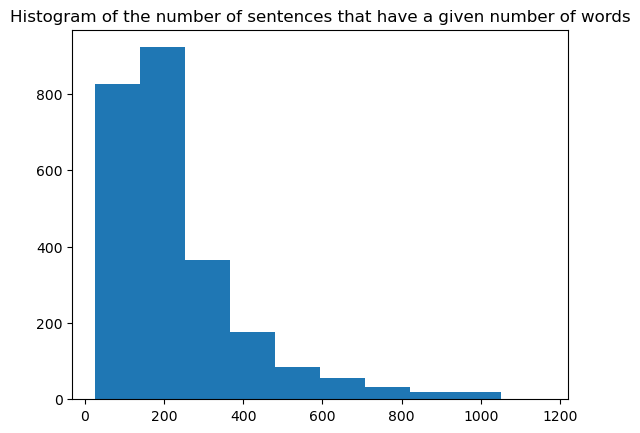

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_hist(X):
    len_ = [len(_) for _ in X]
    plt.hist(len_)
    plt.title('Histogram of the number of sentences that have a given number of words')
    plt.show()

plot_hist(X_train)